# Lab 6_кластерный анализ в задаче сегментации пользователей

Описание задачи:
Для понимания структуры платящих пользователей очень часто используются алгоритмы кластеризации, изначально мы не знаем какие классы удастся выделить и сколько их будет. В общем случае нам интересно выделить пользователей, которые приносят в наш продукт большую часть денег, пользователей которые представляют некий портрет среднего пользователя нашего продукта и пользователей, которые по каким-то причинам не очень охотно платят. 

В качестве “подопытного кролика” предлагается рассмотреть набор данных Segmetation.csv со следующей структурой:

* CustomerId - уникальный идентификатор пользователя
* Monetary - объем средств, который пользователь принес в продукт за анализируемый период времени
* Recency -  время последнего платежа пользователя за анализируемый период времени
* Frequency - количество платежей, которое пользователь совершил за анализируемый период времени
* factor_* - замаскированные показатели

Есть описательные статистики разных  пользователей. Найдите среди всех пользователей похожие группы, проведите кластерный анализ и подумайте есть ли здесь вообще зависимости или нет? 


Задачи:

* 1 - Необходимо разработать модель, которая позволит разделить пользователей на классы по их платежному поведению, должна получится ясная картина того, в какой класс попал каждый пользовать и почему, количество классов определяете Вы, руководствуясь аналитикой и здравым смыслом. Возможна ситуация, когда ряд пользователь не попал ни в один из выделенных классов, таких пользователей можно отнести к классу Other, но он не должен быть слишком большим, не забывайте, что цель разработки данной модели -  понять структуру платящих пользователей продукта, а не запутаться еще больше. В качестве основы модели могут использоваться алгоритмы машинного обучения или методы классической аналитики.
* 2 - показать средние значения факторов в разных кластерах
* 3 - ответить на вопрос, какие из факторов не несут информации. Ответом на Задание 3 являются названия факторов без какой-либо информации через запятую
* 4 - в коде напишите, какие кластеры Вы выделили и почему
* 5 - визуализируйте кластеры

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
%matplotlib inline

In [ ]:
segment = pd.read_csv('/content/drive/MyDrive/4 semestre/Введение в искусственный интеллек/HW/Part 2_Базовые алгоритмы ML/Кластеризация/Копия KA_segm.csv', header=0)
segment.head()

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X = segment.iloc[:, 3:7]
X

,Frequency,factor_1,factor_2,factor_3
0,6,0.35,0.08,0.609740
1,4,0.66,0.16,0.942272
2,6,0.92,0.20,0.323030
3,10,0.35,0.78,0.876833
4,5,0.51,0.44,0.912099
...,...,...,...,...
15995,5,0.22,0.92,0.279858
15996,9,0.66,0.55,0.045826
15997,2,0.41,0.80,0.438510
15998,1,0.75,0.17,0.009277


In [ ]:
from sklearn.cluster import KMeans

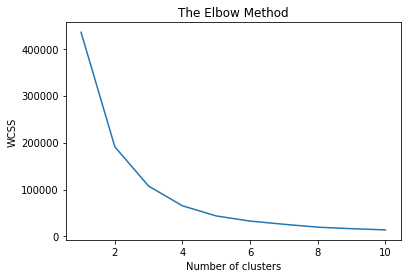

In [ ]:
wcss = []
for i in range(1, 11):
    #esto es para sabe el max y el min
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
    #para entrenar el modelo, y saber como ubicar los nodos de cada grupo
    kmeans.fit(X)
    #el parametro de la suma de las distancias
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([2, 0, 2, ..., 0, 0, 1], dtype=int32)

In [ ]:
X['kmeans_cluster'] = y_kmeans

In [ ]:
X.head()

,Frequency,factor_1,factor_2,factor_3,kmeans_cluster
0,6,0.35,0.08,0.609740,2
1,4,0.66,0.16,0.942272,0
2,6,0.92,0.20,0.323030,2
3,10,0.35,0.78,0.876833,2
4,5,0.51,0.44,0.912099,2


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x = x.drop(['CustomerId','Recency'], axis=1)
x

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4
0,100.40,6,0.35,0.08,0.609740,0.949383
1,170.00,4,0.66,0.16,0.942272,0.479846
2,70.75,6,0.92,0.20,0.323030,0.007076
3,75.00,10,0.35,0.78,0.876833,0.088974
4,94.51,5,0.51,0.44,0.912099,0.206194
...,...,...,...,...,...,...
15995,110.00,5,0.22,0.92,0.279858,0.012416
15996,175.00,9,0.66,0.55,0.045826,0.025403
15997,94.21,2,0.41,0.80,0.438510,0.665808
15998,3.35,1,0.75,0.17,0.009277,0.572111


In [ ]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x)
pca_x_df = pd.DataFrame(data = pca_x, columns=['component_1', 'component_2'])
pca_x_cluster = pd.concat([pca_x_df, X[['kmeans_cluster']]], axis=1)
pca_x_cluster

,component_1,component_2,kmeans_cluster
0,-29.524428,2.651057,2
1,40.020444,-0.764825,0
2,-59.168290,3.253962,2
3,-54.837761,7.167070,2
4,-35.433566,1.771182,2
...,...,...,...
15995,-19.946769,1.455042,2
15996,45.121177,4.131187,2
15997,-35.794556,-1.222463,0
15998,-126.656088,-0.373382,0


IndexError: ignored

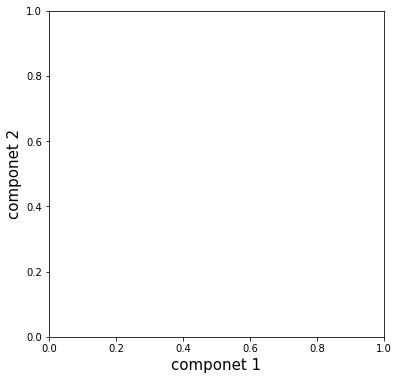

In [ ]:
from pandas.compat.numpy import np_array_datetime64_compat
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("componet 1", fontsize =15)
ax.set_ylabel("componet 2", fontsize =15)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x=pca_x_cluster.component_1, y=pca_x_cluster.component_2, 
c = color_theme[pca_x_cluster], s=50  )

plt.show()


In [ ]:
pca_x_cluster.kmeans_cluster

0        2
1        0
2        2
3        2
4        2
        ..
15995    2
15996    2
15997    0
15998    0
15999    1
Name: kmeans_cluster, Length: 16000, dtype: int32